In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

##### Load the data

In [2]:
%run ../util/load_data.py

data = load_data("../data")
data

{'attributes': ['Id',
  'Elevation',
  'Aspect',
  'Slope',
  'Horizontal_Distance_To_Hydrology',
  'Vertical_Distance_To_Hydrology',
  'Horizontal_Distance_To_Roadways',
  'Hillshade_9am',
  'Hillshade_Noon',
  'Hillshade_3pm',
  'Horizontal_Distance_To_Fire_Points',
  'Cover_Type',
  'Soil_Type',
  'Wilderness_Type'],
 'categorical_attributes': ['Soil_Type', 'Wilderness_Type'],
 'numerical_attributes': ['Aspect',
  'Elevation',
  'Hillshade_3pm',
  'Hillshade_9am',
  'Hillshade_Noon',
  'Horizontal_Distance_To_Fire_Points',
  'Horizontal_Distance_To_Hydrology',
  'Horizontal_Distance_To_Roadways',
  'Slope',
  'Vertical_Distance_To_Hydrology'],
 'target': ['Cover_Type'],
 'test_data':             Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
 0        15121       2680     354     14                                 0   
 1        15122       2683       0     13                                 0   
 2        15123       2713      16     15                           

In [3]:
first_quantiles = data['train_data'][data['numerical_attributes']].quantile(0.25)
third_quantiles = data['train_data'][data['numerical_attributes']].quantile(0.75)

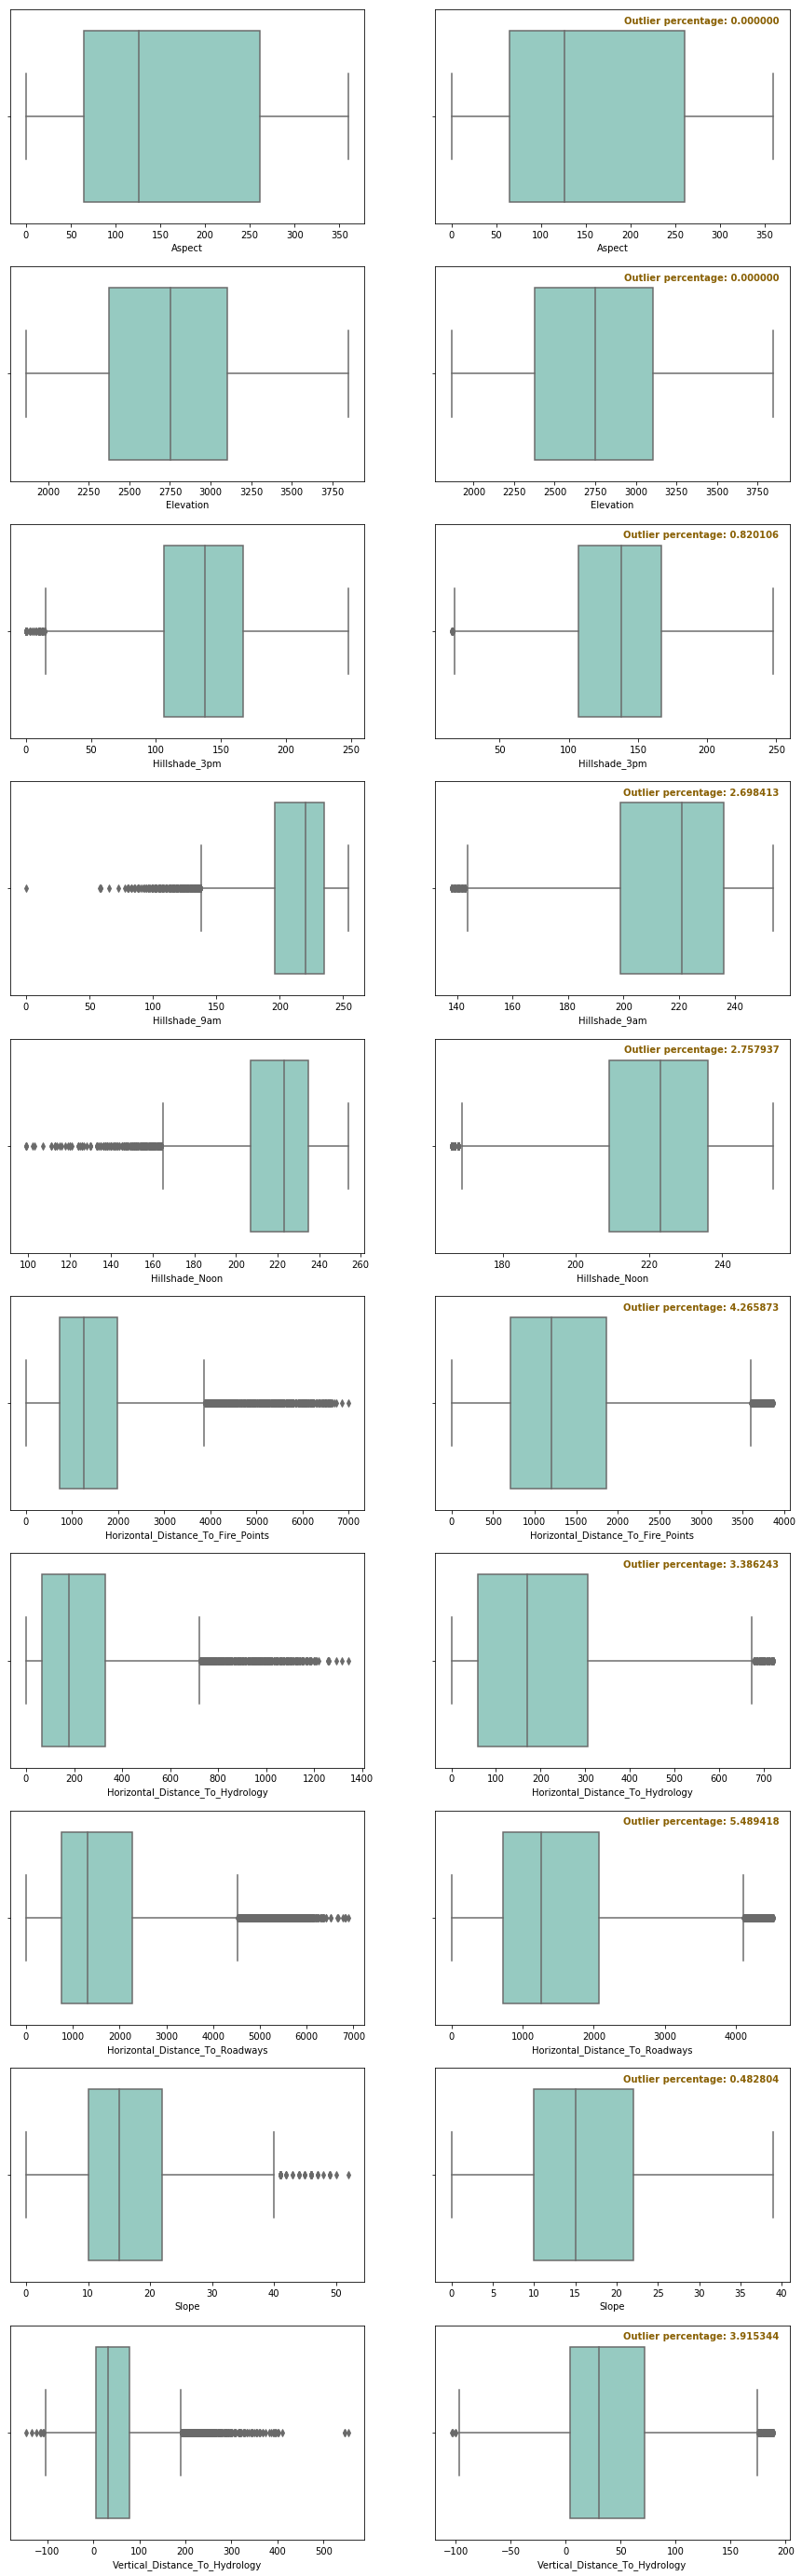

In [4]:
outlier_ids = []
_, ax = plt.subplots(nrows=10, ncols=2, figsize=(15, 50))
train_data = data['train_data']

for idx, numerical_attribute in enumerate(data['numerical_attributes']):
    first_quantile = first_quantiles[numerical_attribute]
    third_quantile = third_quantiles[numerical_attribute]
    
    iqr = third_quantile - first_quantile
    
    without_outlier_df = train_data[train_data[numerical_attribute] > first_quantile - 1.5*iqr]
    without_outlier_df = without_outlier_df[without_outlier_df[numerical_attribute] < third_quantile + 1.5*iqr]
    
    outliers = train_data[~train_data.isin(without_outlier_df).all(1)]
    outlier_ids += outliers['Id'].values.tolist()
    outlier_percentage = 100 * len(outliers.index)/len(train_data.index)
    
    ax[idx][1].text(x=0.97, y=0.97, transform=ax[idx][1].transAxes, s="Outlier percentage: %f" % outlier_percentage,\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
    
    sns.boxplot(x=numerical_attribute, data=train_data, palette="Set3", ax=ax[idx][0])
    sns.boxplot(x=numerical_attribute, data=without_outlier_df, palette="Set3", ax=ax[idx][1])
    

In [5]:
outliers = train_data[train_data['Id'].isin(outlier_ids)]
total_outlier_percentage = 100*len(outliers.index)/len(train_data.index)
"Total outlier percentage: %f" % total_outlier_percentage

'Total outlier percentage: 19.087302'

In [6]:
data_without_univariate_outliers = train_data[~train_data['Id'].isin(outlier_ids)]
data_without_univariate_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12234 entries, 184 to 15119
Data columns (total 14 columns):
Id                                    12234 non-null int64
Elevation                             12234 non-null int64
Aspect                                12234 non-null int64
Slope                                 12234 non-null int64
Horizontal_Distance_To_Hydrology      12234 non-null int64
Vertical_Distance_To_Hydrology        12234 non-null int64
Horizontal_Distance_To_Roadways       12234 non-null int64
Hillshade_9am                         12234 non-null int64
Hillshade_Noon                        12234 non-null int64
Hillshade_3pm                         12234 non-null int64
Horizontal_Distance_To_Fire_Points    12234 non-null int64
Cover_Type                            12234 non-null int64
Soil_Type                             12234 non-null int64
Wilderness_Type                       12234 non-null int64
dtypes: int64(14)
memory usage: 1.4 MB
